#**APPLICATION OF SENTIMENT ANALYSIS IN RECOMMENDATION SYSTEMS**

---

###**By: Ong Wei Aun (TP063332)**

Web App: https://share.streamlit.io/weiaun96/ecommerce-recommendation-web-app/main/web_app.py

In [6]:
#Convert to HTML

%%shell
jupyter nbconvert --to html ///content/HTML.ipynb

[NbConvertApp] Converting notebook ///content/HTML.ipynb to html
[NbConvertApp] Writing 1430726 bytes to ///content/HTML.html


#Importing Files

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the product review data in Pandas

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/My Unlimited Storage/amazon_reviews_us_Outdoors_v1_00.tsv/original_convert.csv')

In [ ]:
# Listing columns in the dataset
list(df.columns)

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date']

####DATA COLUMNS:
marketplace       - 2 letter country code of the marketplace where the review was written.

customer_id       - Random identifier that can be used to aggregate reviews written by a single author.

review_id         - The unique ID of the review.

product_id        - The unique Product ID the review pertains to. In the multilingual dataset the reviews for the same product in different countries can be grouped by the same product_id.

product_parent    - Random identifier that can be used to aggregate reviews for the same product.

product_title     - Title of the product.

product_category  - Broad product category that can be used to group reviews (also used to group the dataset into coherent parts).

star_rating       - The 1-5 star rating of the review.

helpful_votes     - Number of helpful votes.

total_votes       - Number of total votes the review received.

vine              - Review was written as part of the Vine program.

verified_purchase - The review is on a verified purchase.

review_headline   - The title of the review.

review_body       - The review text.

review_date       - The date the review was written.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299811 entries, 0 to 2299810
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        object 
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
dtypes: float64(2), int64(2), object(11)
memory usage: 263.2+ MB


#Dropping and renaming columns
The dataset contains 1048482 datapoints with 15 variables. 

In [ ]:
df['marketplace'].value_counts()

US    2299811
Name: marketplace, dtype: int64

Column 'marketplace' comprises of only US because the dataset was extracted from the Amazon US region website.

In [ ]:
df['product_category'].value_counts()

Outdoors                                                                                                                                                                                                                                   2299808
Light is decent. If the &#34;sticky pad&#34; actually stuck & didn't fell off every day; it would get 4 stars. However no matter how much I cleaned and followed the instructions; it took ~8 hours before the box fell.                         1
I now have three &#34;Life is Good&#34; T-shirts so I must love them!  The quality is first-rate and so is the workmanship.  They wash and dry wonderfully with no shrinkage nor excess wrinkling. . . . so, my &#34;Life is Good&#34;!          1
2013-08-20                                                                                                                                                                                                                                       1
Name: product_category, dtyp

Column 'product category' mainly consists of Outdoors because this is a dataset of Ourdoors product reviews. Besides, they are also 3 observations that are from different columns, these data must be dropped.

In [ ]:
df['product_parent'].value_counts()

863230011    6091
842753395    4908
805416447    4797
150248498    4785
215012885    3307
             ... 
891086475       1
456229693       1
476905577       1
388098574       1
478660694       1
Name: product_parent, Length: 239320, dtype: int64

Column 'product_parent' will be dropped because it is used to aggregate reviews for the same product family while product id can also be used.

In [ ]:
print(df['helpful_votes'].value_counts().sort_index());

0.0       1498732
1.0        361187
2.0        140938
3.0         76795
4.0         46491
           ...   
2362.0          1
2449.0          1
2478.0          1
2663.0          1
2703.0          1
Name: helpful_votes, Length: 633, dtype: int64


In [ ]:
print(df['total_votes'].value_counts().sort_index());

0.0       1332973
1.0        397892
2.0        178710
3.0         97867
4.0         61963
           ...   
2496.0          1
2556.0          1
2600.0          1
2701.0          1
2751.0          1
Name: total_votes, Length: 657, dtype: int64


Columns 'helpful_votes' and 'total votes' will be dropped because this study mainly focuses on the sentiment analysis of the reviews and also using the sentiment scores for recommendation system

In [ ]:
# Dropping variables
df2 = df.drop(['marketplace','product_parent','product_category','helpful_votes','total_votes','review_headline'], axis = 1)

Column 'review_headline' is also dropped because it is less relevant when the actual review content is available in the 'review_body' column

In [ ]:
print ("Total data:", str(df2.shape))
df2.head()

Total data: (2299811, 9)


,customer_id,review_id,product_id,product_title,star_rating,vine,verified_purchase,review_body,review_date
0,18446823,R35T75OLUGHL5C,B000NV6H94,Stearns Youth Boating Vest (50-90 lbs.),4,N,Y,GOOD VALUE,2015-08-31
1,13724367,R2BV735O46BN33,B000IN0W3Y,Primal Wear Men's Pink Floyd Dark Side of The ...,5,N,Y,Excellent quality.,2015-08-31
2,51001958,R2NBEUGPQQGXP1,B008RBJXFM,Osprey Hydraulics Reservoir,4,N,Y,3rd season using it. I only fill with water an...,2015-08-31
3,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,CamelBak eddy .75L Water Bottle,3,N,Y,poor construction as mildew keeps forming in t...,2015-08-31
4,30907790,R39PEQBT5ISEF4,B00EZA3VW0,Children Black Red Striped Plastic Housing Ska...,1,N,Y,"Very bad quality, clips was broken when it arr...",2015-08-31


# Exploratory Data Analysis

###Review Dates

In [ ]:
df2["review_date"] = df2["review_date"].astype("datetime64")
date_df = df2 [["review_date"]]

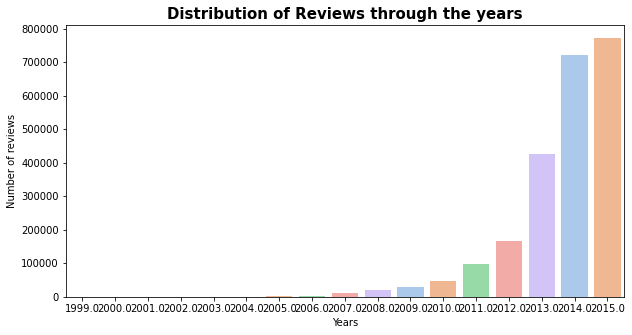

1999.0         2
2000.0        19
2001.0        74
2002.0       100
2003.0       260
2004.0       447
2005.0      1363
2006.0      3449
2007.0     12194
2008.0     19261
2009.0     29985
2010.0     48514
2011.0     97043
2012.0    166961
2013.0    427264
2014.0    720841
2015.0    772021
Name: review_date, dtype: int64


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(date_df["review_date"].dt.year, palette=sns.color_palette("pastel", 5))
plt.title("Distribution of Reviews through the years", fontweight='bold', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Number of reviews")
plt.show();

print(date_df["review_date"].dt.year.value_counts().sort_index());

The number of reviews had a huge increase from 2012 onwards, this indicates the rising adoption of e-commerce around the world

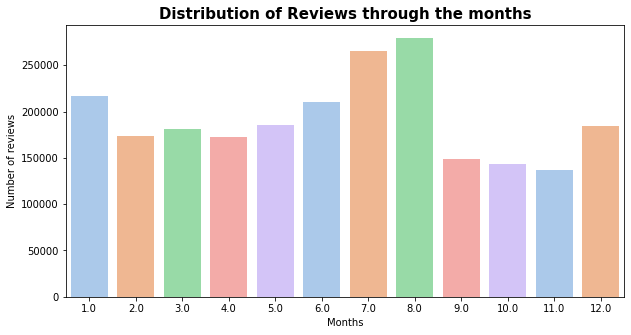

1.0     217310
2.0     174084
3.0     181524
4.0     172159
5.0     185574
6.0     210439
7.0     265043
8.0     279461
9.0     148975
10.0    143787
11.0    137356
12.0    184086
Name: review_date, dtype: int64


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(date_df["review_date"].dt.month, palette=sns.color_palette("pastel", 5))
plt.title("Distribution of Reviews through the months", fontweight='bold', fontsize=15)
plt.xlabel("Months")
plt.ylabel("Number of reviews")
plt.show();

print(date_df["review_date"].dt.month.value_counts().sort_index());

The annual seasonality chart shows that the number of reviews peaks during the middle of the year. This can be explained through the weather seasonality where the summer is arriving. People start preparing for their outdoors activities and make their equipment purchases online.

Besides that, January and December also shows a higher than average volume of reviews. This period coincides with the shopping festive seasons like Black Friday, Christmas, Thanksgiving and Cyber Monday, hence leading to an increase of sales.

###Vine Voices

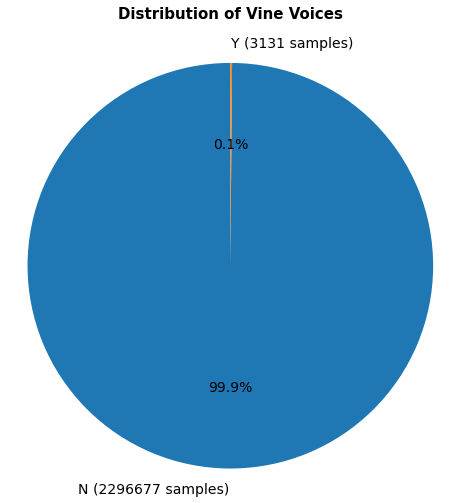

In [ ]:
#Pie Chart can illustrate the percentage distribution of the Vine members
import matplotlib.pyplot as plt
import seaborn as sns

labels = [f'{k} ({df2["vine"].value_counts()[k]} samples)' for k in df2['vine'].value_counts().keys()]
sizes = dict(df2['vine'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
colors = sns.color_palette('tab10')
ax1.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Vine Voices",pad=30, fontweight='bold', fontsize=15)
plt.show()

Only a remarkably small percentage of the reviews (0.1%) are from Vine members. This is understandable when Amazon only invites the most trusted reviewers on Amazon to join as Vine Voices.

(Ref: https://www.amazon.com/vine/about)

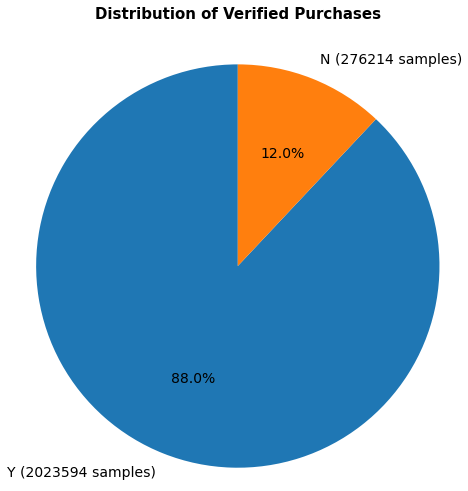

In [ ]:
#Pie Chart can illustrate the percentage distribution of the verified purchases
import matplotlib.pyplot as plt
import seaborn as sns

labels = [f'{k} ({df2["verified_purchase"].value_counts()[k]} samples)' for k in df2['verified_purchase'].value_counts().keys()]
sizes = dict(df2['verified_purchase'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
colors = sns.color_palette('tab10')
ax1.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Verified Purchases",pad=30, fontweight='bold', fontsize=15)
plt.show()

88.0% of the reviews has been verified as actual purchases. To make the end results fair, only verified purchases will be used for further processes of the study.

In [ ]:
#Drop verified purchase, filter out N values, left with Y values
df2 = df2[df2['verified_purchase'] != 'N']

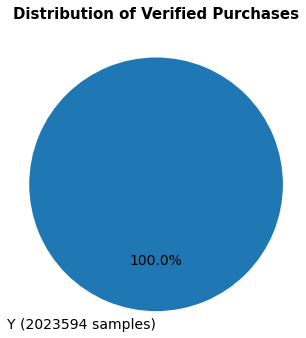

In [ ]:
labels = [f'{k} ({df2["verified_purchase"].value_counts()[k]} samples)' for k in df2['verified_purchase'].value_counts().keys()]
sizes = dict(df2['verified_purchase'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(5,5))
colors = sns.color_palette('tab10')
ax1.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Verified Purchases",pad=30, fontweight='bold', fontsize=15)
plt.show()

#Check missing values

In [ ]:
df2.isnull().sum()

customer_id            0
review_id              0
product_id             0
product_title          0
star_rating            1
vine                   3
verified_purchase      3
review_body          135
review_date           13
dtype: int64

Since the number of missing values is relatively few compared to the entire dataset, they will be dropped from the dataset

In [ ]:
#Drop Null values in the columns in Pandas
df2=df2.dropna()

In [ ]:
df2.isnull().sum()

customer_id          0
review_id            0
product_id           0
product_title        0
star_rating          0
vine                 0
verified_purchase    0
review_body          0
review_date          0
dtype: int64

After removing the null values, there are no more missing values in the dataset.

#Finding the distribution of ratings

In [ ]:
import numpy as np

print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df2.shape[0])

# counting unique values
customer = len(pd.unique(df2['customer_id']))
product = len(pd.unique(df2['product_id']))
print("Total No of Users: ",customer)
print("Total No of Products: ",product)

Total data 
--------------------------------------------------

Total no of ratings : 2023472
Total No of Users:  1356923
Total No of Products:  357294


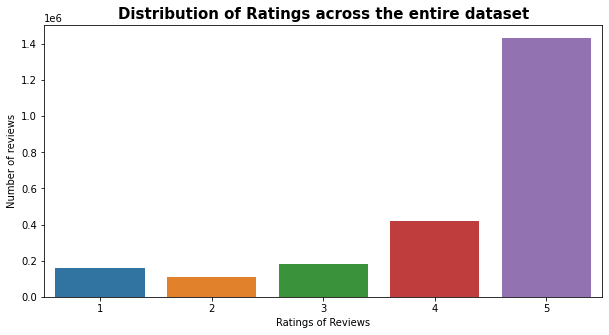

1     161244
2     109309
3     178901
4     417086
5    1433126
Name: star_rating, dtype: int64


In [ ]:
df2['star_rating'] = pd.to_numeric(df2['star_rating'], errors='coerce')

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df2['star_rating'], palette=sns.color_palette("tab10", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews")
plt.show();

print(df2['star_rating'].value_counts().sort_index());

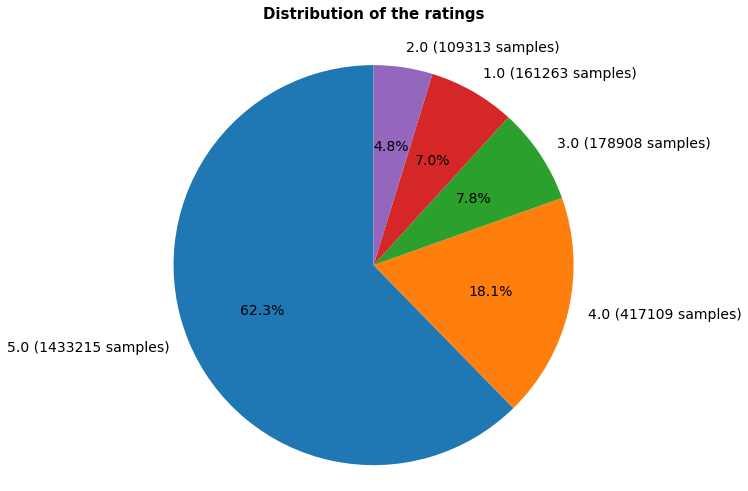

In [ ]:
#Pie Chart can illustrate the percentage distribution of the rating scores
labels = [f'{k} ({df2["star_rating"].value_counts()[k]} samples)' for k in df2['star_rating'].value_counts().keys()]
sizes = dict(df2['star_rating'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
colors = sns.color_palette('tab10')[0:5]
ax1.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of the ratings",pad=30, fontweight='bold', fontsize=15)
plt.show()

The dataset is positively skewed with majority of the ratings are 5. However, no editing will be made to the dataset so that the sentiment analysis of the reviews can be compared to the actual ratings

In [ ]:
#df2["review_word_count"] = df2["review_body"].apply(lambda x: len(x.split()))
#with pd.option_context('display.max_colwidth', -1):
#    display(df2.head(5))

#Take subset of dataset to make it less sparse/more dense.
- keep the users only who has given 50 or more number of ratings)

In [ ]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=df2.groupby("product_id").filter(lambda x:x['vader_sentiment_score'].count() >=50)

In [ ]:
new_df['avg_rating'] = new_df.groupby('product_id')['star_rating'].transform('mean')

#Sentiment Analysis

Ref: https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

###Text Cleaning

In [ ]:
%%time

import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
new_df['Cleaned Reviews'] = new_df['review_body'].apply(clean)
new_df.head()

CPU times: user 16.8 s, sys: 213 ms, total: 17 s
Wall time: 17 s


###Tokenization, POS tagging, Stopwords Removal

In [ ]:
# Define a function to tokenize the text
def tokenize(text):
    # Removes all special characters and numericals leaving the alphabets
    token = word_tokenize(text)
    return token

# Tokenize the text in the review column
new_df['Tokens'] = new_df['review_body'].apply(tokenize)
new_df.head()

,customer_id,review_id,product_id,product_title,star_rating,vine,verified_purchase,review_body,review_date,avg_rating,Cleaned Reviews,Tokens
0,18446823,R35T75OLUGHL5C,B000NV6H94,Stearns Youth Boating Vest (50-90 lbs.),4,N,Y,GOOD VALUE,2015-08-31,NaN,GOOD VALUE,"[GOOD, VALUE]"
2,51001958,R2NBEUGPQQGXP1,B008RBJXFM,Osprey Hydraulics Reservoir,4,N,Y,3rd season using it. I only fill with water an...,2015-08-31,NaN,rd season using it I only fill with water and...,"[3rd, season, using, it, ., I, only, fill, wit..."
3,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,CamelBak eddy .75L Water Bottle,3,N,Y,poor construction as mildew keeps forming in t...,2015-08-31,NaN,poor construction as mildew keeps forming in t...,"[poor, construction, as, mildew, keeps, formin..."
5,20232229,R3GNM3SU9VHJFT,B006JA8WEG,Ibera Bicycle Triangle Frame Bag,4,N,Y,Nice bag. Should have another strap on bottom ...,2015-08-31,NaN,Nice bag Should have another strap on bottom o...,"[Nice, bag, ., Should, have, another, strap, o..."
6,17698862,R2Y81OP0EK467,B002PWFSEO,Therm-a-Rest Compressible Travel Pillow for Ca...,5,N,Y,Gave this to my son who used it while we were ...,2015-08-31,NaN,Gave this to my son who used it while we were ...,"[Gave, this, to, my, son, who, used, it, while..."


In [ ]:
# Define a function to remove stopwords from the text
def stopword(text):
    # Removes all special characters and numericals leaving the alphabets
    token = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    
    filtered_sentence = [w for w in token if not w.lower() in stop_words]
    filtered_sentence = []

    for w in token:
      if w not in stop_words:
        filtered_sentence.append(w)

    return filtered_sentence

# Apply the function to the text in the review column
new_df['Stopword Removed'] = new_df['review_body'].apply(stopword)
new_df.head()

In [ ]:
%%time

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

new_df['POS tagged'] = new_df['Cleaned Reviews'].apply(token_stop_pos)
new_df.head()

###Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
      return lemma_rew

new_df['Lemma'] = new_df['POS tagged'].apply(lemmatize)
new_df.head()

###Word Cloud

####Plotting word cloud to understand the top words that have occured most frequently in the reviews.

In [ ]:
#Extract the most frequent thirty words
import collections
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

text = " ".join(review for review in new_df["review_body"])
print ("There are {} words in the combination of all reviews.".format(len(text)))

#Create stopword list:
default_stopwords=set(stopwords.words('english'))
filtered_words = [word for word in text.split() if word not in default_stopwords]
counted_words = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words.most_common(30):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, Count: {1}'.format(i,j))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
There are 280997751 words in the combination of all reviews.
Word: I, Count: 1423326
Word: The, Count: 295998
Word: It, Count: 217370
Word: one, Count: 197153
Word: /><, Count: 186553
Word: This, Count: 174057
Word: would, Count: 163520
Word: like, Count: 157680
Word: use, Count: 155706
Word: great, Count: 150670
Word: get, Count: 134596
Word: bike, Count: 131891
Word: good, Count: 128807
Word: light, Count: 123567
Word: it., Count: 109984
Word: easy, Count: 108009
Word: little, Count: 105283
Word: well, Count: 100173
Word: used, Count: 99283
Word: water, Count: 96791
Word: really, Count: 94449
Word: bought, Count: 89765
Word: much, Count: 78626
Word: put, Count: 73825
Word: two, Count: 73674
Word: product, Count: 73561
Word: time, Count: 71407
Word: I'm, Count: 70698
Word: back, Count: 70254
Word: even, Count: 69160


In [ ]:
%%time

# Create stopword list:
default_stopwords=set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=default_stopwords, background_color="white", width=1200, height=600).generate(text)

# Display the generated image:
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the image folder:
wordcloud.to_file("/content/drive/MyDrive/weiaun96@gmail.com/APU Masters (tp063332@mail.apu.edu.my)/Sem 3/Capstone Project 2/Images/wordcloud_before_remove.png")

####Observations:
There is a high frequency(big size among the word counts) of occurance of the word "br" in the reviews. Since it occurs in the html tags indicating breaks: 'br' '/br', we can presume the presence of other html tags as well. So in the text preprocessing step, we need to remove all the html related text/tags.

In [ ]:
#remove "br" from reviews
new_df['review_body'] = new_df['review_body'].str.replace('br', '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
There are 218135909 words in the combination of all review.


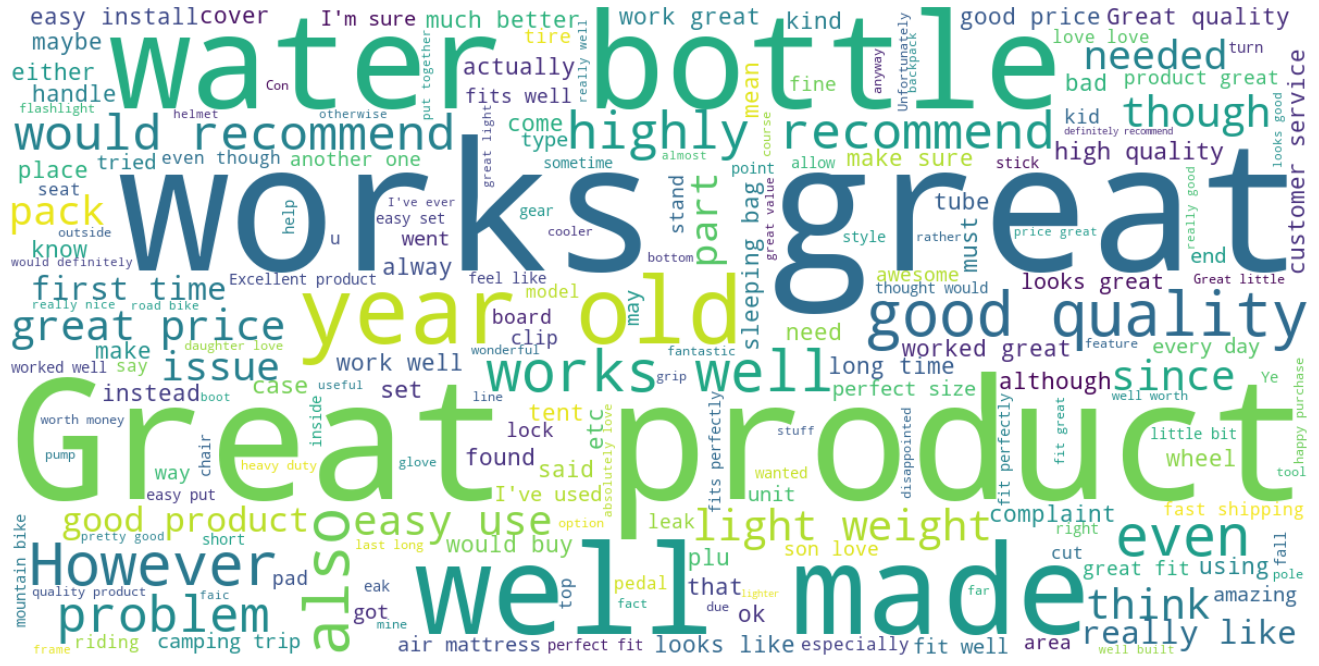

CPU times: user 2min 14s, sys: 5.72 s, total: 2min 20s
Wall time: 2min 20s


In [ ]:
#Re-run to check 'br' are already removed

%%time
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

text = " ".join(review for review in df2["review_body"])
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
default_stopwords=set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=default_stopwords, background_color="white", width=1200, height=600).generate(text)

# Display the generated image:
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the image folder:
wordcloud.to_file("/content/drive/MyDrive/weiaun96@gmail.com/APU Masters (tp063332@mail.apu.edu.my)/Sem 3/Capstone Project 2/Images/wordcloud_after_remove.png")

###Using VADER SentimentIntensityAnalyser to calculate Sentiment Score

In [ ]:
#Using the NLTK library for importing the SentimentIntensityAnalyzer.

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Creating the instance of SentimentIntensityAnalyzer.
%%time
sent = SentimentIntensityAnalyzer()

polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in new_df['review_body']]
new_df['clean_vader_score'] = polarity

CPU times: user 27min 47s, sys: 14.2 s, total: 28min 1s
Wall time: 28min 4s


In [ ]:
df2['avg_clean_vader'] = df2.groupby('product_id')['clean_vader_score'].transform('mean')
df2.sort_values(by=['avg_clean_vader'],ascending=False)

,customer_id,review_id,product_id,product_title,star_rating,vine,verified_purchase,review_body,review_date,vader_sentiment_score,avg_vader_score
114625,12537696,R2HP1AJPFVT4CJ,B00PFZ5C1W,Julbo Coast Performance Sunglasses,5.0,N,Y,I sail competitively. I bought these glasses f...,2015-08-02,1.00,1.00
605702,45241892,R2QZ0L491NBZY6,B005F8Y73I,Grenade Men's Astro Jacket,4.0,N,Y,Good 10/10 waterproof jacket for snowboarding....,2015-02-23,1.00,1.00
1980392,53064505,R1C85XA7U7REH1,B008E7F0OM,Life is Good Dog Nylon Collar,5.0,N,Y,I was looking for the collar on the LIG websit...,2012-10-10,1.00,1.00
2100363,35709275,R2ZY6W6SAFCF9X,B004EPXL1M,Pearl Izumi Men's Elite LTD Jersey,5.0,N,Y,This review will basically echo my review of t...,2011-11-16,1.00,1.00
1474215,50720918,R2PQ3CIM8QDGH9,B006PHMFXM,"Podium Pro ""Domestique"" Bib Shorts",5.0,N,N,I’m a fan of Phil Gaimon so when I learned tha...,2014-01-10,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
160868,46117302,R1MMRD0XLNANA8,B0037TM26G,PRO-TEC Drop-In Black Small / Medium Elbow Pads,1.0,N,N,I bought these just over a year ago (May 2014)...,2015-07-21,-0.99,-0.99
95785,33816513,R29Z990MIR2VIO,B012FTDMDA,"Ferrari Long Slide Skateboard,scuderia Ferrari...",2.0,N,Y,I can't believe that Ferrari would have their ...,2015-08-07,-0.99,-0.99
483332,4052369,R3ELNBBHJ32I5J,B0059AWU9A,Outdoor Research Men's Radiant Hybrid Pullover,2.0,N,Y,This was not a good purchase; it did NOT fit w...,2015-04-06,-0.99,-0.99
949745,26612735,RPT2Z6TR1GU34,B00DSBM182,Piggyback Rider Nomis Carrier Basic,3.0,N,N,My review of the older style Piggyback Rider: ...,2014-10-22,-1.00,-1.00


In [ ]:
new_df.sample(5)

,customer_id,review_id,product_id,product_title,star_rating,vine,verified_purchase,review_body,review_date,vader_sentiment_score,avg_vader_score
1271917,15151497,R2GN66ALCMA5AK,B00165P53K,Avenir Cone Wrench Set,5.0,N,Y,Got sooner than expected. For a cheap/universa...,2014-06-06,0.20,0.170500
163678,13714724,R32UIWEHWLAD32,B0069EB1M2,Hydro Flask Insulated Wide Mouth Stainless Ste...,5.0,N,Y,This is the most amazing thing evarrrr! I put ...,2015-07-20,0.79,0.598682
2194487,30396505,R2XYS1X8NJUP9K,B001F1FVPC,Friction Zone Skin Protectant,4.0,N,Y,I know most people here will be looking at thi...,2010-10-24,0.93,0.446061
484540,48468431,R3AK89U7FC3S6R,B0049PFF20,Klean Kanteen 16-Ounce Wide Insulated Stainles...,5.0,N,Y,Period.,2015-04-06,0.00,0.527273
2235003,49763404,RBKZDNNUIP2UP,B000W8JVZK,CRUMPLER THE WESTERN LAWN BAG,4.0,N,Y,I first purchased the photo insert for this ba...,2009-12-05,0.94,0.940000


###Export/Import vader_sentiment.csv

In [ ]:
#EXPORTING
#converting tsv file into csv
#new_df.to_csv('/content/drive/MyDrive/My Unlimited Storage/amazon_reviews_us_Outdoors_v1_00.tsv/clean_vader_sentiment.csv',index=False)
  
# output
#print("Successfully made csv file")

#IMPORTING
import pandas as pd
new_df = pd.read_csv('/content/drive/MyDrive/My Unlimited Storage/amazon_reviews_us_Outdoors_v1_00.tsv/clean_vader_sentiment.csv')

In [ ]:
new_df

,customer_id,review_id,product_id,product_title,star_rating,vine,verified_purchase,review_body,review_date,vader_sentiment_score,avg_vader_score
0,18446823,R35T75OLUGHL5C,B000NV6H94,Stearns Youth Boating Vest (50-90 lbs.),4.0,N,Y,GOOD VALUE,2015-08-31,0.65,0.343261
1,13724367,R2BV735O46BN33,B000IN0W3Y,Primal Wear Men's Pink Floyd Dark Side of The ...,5.0,N,Y,Excellent quality.,2015-08-31,0.57,0.675000
2,51001958,R2NBEUGPQQGXP1,B008RBJXFM,Osprey Hydraulics Reservoir,4.0,N,Y,3rd season using it. I only fill with water an...,2015-08-31,0.99,0.466813
3,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,CamelBak eddy .75L Water Bottle,3.0,N,Y,poor construction as mildew keeps forming in t...,2015-08-31,0.34,0.533175
4,30907790,R39PEQBT5ISEF4,B00EZA3VW0,Children Black Red Striped Plastic Housing Ska...,1.0,N,Y,"Very bad quality, clips was broken when it arr...",2015-08-31,-0.57,-0.153333
...,...,...,...,...,...,...,...,...,...,...,...
2299661,52823352,R2LQD2IV5ZWF7G,B0000224UE,Victorinox SwissTool,5.0,N,N,The American Leatherman was a great improvemen...,2000-05-06,0.92,0.569550
2299662,50682657,R2XLPTZ391M3PM,B00000J4BN,Spring Swings Fun Ride Original Zip Line,5.0,N,N,I bought this toy 5 years ago and my children ...,2000-04-16,0.94,0.527119
2299663,50409591,R1BRPTHYOJF9NC,B0000224UE,Victorinox SwissTool,5.0,N,N,I purchased this GEM when it first came out an...,2000-03-12,0.92,0.569550
2299664,53094293,R3LJVE6YICJOHI,B0000224UE,Victorinox SwissTool,5.0,N,N,The Leatherman Wave is a fine product but this...,1999-12-28,0.67,0.569550


In [ ]:
new_df['avg_sentiment_score'] = new_df.apply(lambda row: ((row['avg_vader_score']-(-1)) * 5/2), axis=1)
new_df['recommend_score'] = new_df['avg_rating']+new_df['avg_sentiment_score']

In [ ]:
new_df

,customer_id,review_id,product_id,product_title,star_rating,vine,verified_purchase,review_body,review_date,vader_sentiment_score,avg_vader_score,avg_rating,avg_sentiment_score,recommend_score
0,18446823,R35T75OLUGHL5C,B000NV6H94,Stearns Youth Boating Vest (50-90 lbs.),4.0,N,Y,GOOD VALUE,2015-08-31,0.65,0.343261,3.815217,3.358152,7.173370
2,51001958,R2NBEUGPQQGXP1,B008RBJXFM,Osprey Hydraulics Reservoir,4.0,N,Y,3rd season using it. I only fill with water an...,2015-08-31,0.99,0.466813,4.054945,3.667033,7.721978
3,32866903,R17LLAOJ8ITK0S,B00FK8WUQY,CamelBak eddy .75L Water Bottle,3.0,N,Y,poor construction as mildew keeps forming in t...,2015-08-31,0.34,0.533175,4.412698,3.832937,8.245635
5,20232229,R3GNM3SU9VHJFT,B006JA8WEG,Ibera Bicycle Triangle Frame Bag,4.0,N,Y,Nice bag. Should have another strap on bottom ...,2015-08-31,0.70,0.604133,4.433673,4.010332,8.444005
6,17698862,R2Y81OP0EK467,B002PWFSEO,Therm-a-Rest Compressible Travel Pillow for Ca...,5.0,N,Y,Gave this to my son who used it while we were ...,2015-08-31,0.57,0.654941,4.430830,4.137352,8.568182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299659,52064624,R1V5B0I8WCU88G,B00000J0B7,Spring Swings Deluxe Fun Ride (Colors May Vary),5.0,N,N,Attaching the cable is alot more work than exp...,2000-07-29,0.68,0.636667,4.126437,4.091667,8.218103
2299661,52823352,R2LQD2IV5ZWF7G,B0000224UE,Victorinox SwissTool,5.0,N,N,The American Leatherman was a great improvemen...,2000-05-06,0.92,0.569550,4.693694,3.923874,8.617568
2299662,50682657,R2XLPTZ391M3PM,B00000J4BN,Spring Swings Fun Ride Original Zip Line,5.0,N,N,I bought this toy 5 years ago and my children ...,2000-04-16,0.94,0.527119,3.966102,3.817797,7.783898
2299663,50409591,R1BRPTHYOJF9NC,B0000224UE,Victorinox SwissTool,5.0,N,N,I purchased this GEM when it first came out an...,2000-03-12,0.92,0.569550,4.693694,3.923874,8.617568


By implementing the rule of keeping only users who has given 50 or more number of ratings, the observations reduced from 2.3mil to 951k

In [ ]:
#converting tsv file into csv
#new_df.to_csv('/content/drive/MyDrive/My Unlimited Storage/amazon_reviews_us_Outdoors_v1_00.tsv/rating_fifty.csv',index=False)

#import pandas as pd
#new_df = pd.read_csv('/content/drive/MyDrive/My Unlimited Storage/amazon_reviews_us_Outdoors_v1_00.tsv/rating_fifty.csv')

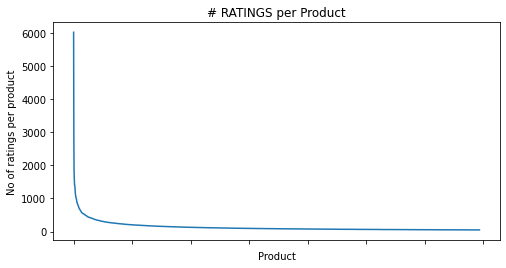

In [ ]:
import matplotlib.pyplot as plt

no_of_ratings_per_product = new_df.groupby(by='product_id')['vader_sentiment_score'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [ ]:
#Total no of rating for product

new_df.groupby('product_id')['vader_sentiment_score'].count().sort_values(ascending=False).head()

product_id
B00FAW4O0A    6020
B000M0MJU2    4750
B006QF3TW4    3306
B000HBILB2    3010
B00NPLSZF8    2855
Name: vader_sentiment_score, dtype: int64

#Relationship between Rating Score and Sentiment Score

In [ ]:
# calculate the Pearson's correlation between avg_rating and avg_vader_score

from numpy.random import randn
from numpy.random import seed
from scipy import stats
from scipy.stats import pearsonr
# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# calculate Pearson's correlation
corr, _ = pearsonr(new_df['avg_rating'], new_df['avg_sentiment_score'])
print('Pearsons correlation: %.3f' % corr)

# calculate ttest significance
stats.ttest_ind(new_df['avg_rating'], new_df['avg_sentiment_score'])

Pearsons correlation: 0.667


Ttest_indResult(statistic=869.6214804286179, pvalue=0.0)

#Recommendation - using search engine and collaborative filtering

###Idea: Create a search engine that gives ranking based on relevancy and recommend score, then generate another set of collaborative filtering results using the first result from the search results.

In [ ]:
reviews = new_df[['customer_id','product_id', 'product_title','recommend_score']]

In [ ]:
reviews

,customer_id,product_id,product_title,recommend_score
0,18446823,B000NV6H94,Stearns Youth Boating Vest (50-90 lbs.),7.173370
2,51001958,B008RBJXFM,Osprey Hydraulics Reservoir,7.721978
3,32866903,B00FK8WUQY,CamelBak eddy .75L Water Bottle,8.245635
5,20232229,B006JA8WEG,Ibera Bicycle Triangle Frame Bag,8.444005
6,17698862,B002PWFSEO,Therm-a-Rest Compressible Travel Pillow for Ca...,8.568182
...,...,...,...,...
2299659,52064624,B00000J0B7,Spring Swings Deluxe Fun Ride (Colors May Vary),8.218103
2299661,52823352,B0000224UE,Victorinox SwissTool,8.617568
2299662,50682657,B00000J4BN,Spring Swings Fun Ride Original Zip Line,7.783898
2299663,50409591,B0000224UE,Victorinox SwissTool,8.617568


In [ ]:
#exporting csv file
#reviews.to_csv('/content/drive/MyDrive/My Unlimited Storage/amazon_reviews_us_Outdoors_v1_00.tsv/reviews2.csv',index=False)

#import numpy as np
#import pandas as pd
#new_df = pd.read_csv('/content/drive/MyDrive/My Unlimited Storage/amazon_reviews_us_Outdoors_v1_00.tsv/reviews2.csv')

## Collaborative Filtering


In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
n_ratings = len(new_df)
n_products = len(new_df['product_id'].unique())
n_customers = len(new_df['customer_id'].unique())
  
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique product id's: {n_products}")
print(f"Number of unique customers: {n_customers}")
print(f"Average ratings per customer: {round(n_ratings/n_customers, 2)}")
print(f"Average ratings per product: {round(n_ratings/n_products, 2)}")

Number of ratings: 951930
Number of unique product id's: 6939
Number of unique customers: 723584
Average ratings per customer: 1.32
Average ratings per product: 137.19


In [ ]:
user_freq = new_df[['customer_id', 'product_id']].groupby('customer_id').count().reset_index()
user_freq.columns = ['customer_id', 'n_ratings']
user_freq.head()

,customer_id,n_ratings
0,10015,1
1,10019,1
2,10129,1
3,10141,1
4,10227,1


In [ ]:
# Now, we create customer-product matrix using scipy csr matrix
from scipy.sparse import csr_matrix
  
def create_matrix(df):
      
    N = len(new_df['customer_id'].unique())
    M = len(new_df['product_id'].unique())
      
    # Map Ids to indices
    user_mapper = dict(zip(np.unique(new_df["customer_id"]), list(range(N))))
    product_mapper = dict(zip(np.unique(new_df["product_id"]), list(range(M))))
      
    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(new_df["customer_id"])))
    product_inv_mapper = dict(zip(list(range(M)), np.unique(new_df["product_id"])))
      
    user_index = [user_mapper[i] for i in new_df['customer_id']]
    product_index = [product_mapper[i] for i in new_df['product_id']]
  
    X = csr_matrix((new_df["vader_sentiment_score"], (product_index, user_index)), shape=(M, N))
      
    return X, user_mapper, product_mapper, user_inv_mapper, product_inv_mapper
  
X, user_mapper, product_mapper, user_inv_mapper, product_inv_mapper = create_matrix(new_df)

In [ ]:
from sklearn.neighbors import NearestNeighbors
"""
Find similar products using KNN
"""
def find_similar_products(product_id, X, k, metric='cosine', show_distance=False):
      
    neighbour_ids = []
      
    product_ind = product_mapper[product_id]
    product_vec = X[product_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    product_vec = product_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(product_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(product_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids
  
  
product_titles = dict(zip(new_df['product_id'], new_df['product_title']))

In [ ]:
product_id = 'fill in the product id here'
  
similar_ids = find_similar_products(product_id, X, k=10)
product_title = product_titles[product_id]
  
print(f"Since you found {product_title},")
print("\nYou may also like these:\n")
for i in similar_ids:
    print(product_titles[i])

##Search Engine (combining the collaborative filtering)

In [ ]:
print('Finding an outdoors product?\n')
searchTerm=input("Search for your outdoors product here (or enter 'exit' to exit):")

if searchTerm.lower() == "exit":
  print("\n-----------------------------------------------\nThanks for shopping with us, have a nice day!")

else:
  searchResult = new_df[new_df['product_title'].str.contains((searchTerm),case=False)]
  searchdupl = searchResult.drop_duplicates(subset='product_title')
  searchResultSorted = searchdupl.sort_values(by=['recommend_score','product_title'],ascending=False).reset_index()
  searchResultSorted.index = np.arange(1, len(searchResultSorted) + 1)
  final_result = searchResultSorted.loc[:,['product_id', 'product_title','recommend_score']].head(10)

  #Replace average VADER score column as recommendation score
  final_result = final_result.rename(columns={'product_id': 'Product ID','product_title': 'Product Title',
                                              'recommend_score': 'Recommendation Score'})
  if len(final_result.index) < 1:
    print ("\nSorry! No results is found, please search again")
  else:
    display(final_result.head(10))

Finding an outdoors product?

Search for your outdoors product here (or enter 'exit' to exit):camping


,Product ID,Product Title,Recommendation Score
1,B00TQAWYFE,Fox Outfitters MicroDry Towel - Ultra Compact ...,9.571296
2,B008VGQLPS,Clark NX-250 Four-Season Camping Hammock,9.559211
3,B00LLH515A,Solo Stove Campfire - 4+ Person Compact Wood B...,9.488433
4,B00V2K00MU,[Durable Hammock & Strap Bundle] Serac Classic...,9.429545
5,B00PT110NG,Neolite Double Camping Hammock - Lightweight P...,9.405603
6,B00DQ3QS7C,Solo Stove 3 Pot Set - Stainless Steel Camping...,9.366071
7,B00KIGWNCE,"Microfiber Travel Towel - Large 52"" x 32"" with...",9.344637
8,B00UVF4TZQ,SIERRA LEDs - Super Bright LED Camping Lantern...,9.335849
9,B00V97YCLQ,Eltronica LED Collapsible Camping Lantern,9.299074
10,B00RW5D8ZK,"Atlas 400 Lumen USB Headlamp, FREE Extra Batte...",9.276724


In [ ]:
print('Finding an outdoors product?\n')
searchTerm=input("Search for your outdoors product here (or enter 'exit' to exit):")

if searchTerm.lower() == "exit":
  print("\n-----------------------------------------------\nThanks for shopping with us, have a nice day!")

else:
  searchResult = new_df[new_df['product_title'].str.contains((searchTerm),case=False)]
  searchdupl = searchResult.drop_duplicates(subset='product_title')
  searchResultSorted = searchdupl.sort_values(by=['recommend_score','product_title'],ascending=False).reset_index()
  searchResultSorted.index = np.arange(1, len(searchResultSorted) + 1)
  final_result = searchResultSorted.loc[:,['product_id', 'product_title','recommend_score']].head(10)

  #Replace average VADER score column as recommendation score
  final_result = final_result.rename(columns={'product_id': 'Product ID','product_title': 'Product Title',
                                              'recommend_score': 'Recommendation Score'})
  if len(final_result.index) < 1:
    print ("\nSorry! No results is found, please search again")
  else:
    display(final_result.head(10))
    print(final_result.iloc[0,0])

    product_id = final_result.iloc[0,0]
    similar_ids = find_similar_products(product_id, X, k=10)
    product_title = product_titles[product_id]
    
    print(f"Since you found the no.1 product: {product_title},")
    print("\nYou may also like these:\n")
    for i in similar_ids:
      print(product_titles[i])

Finding an outdoors product?

Search for your outdoors product here (or enter 'exit' to exit):exit

-----------------------------------------------
Thanks for shopping with us, have a nice day!
